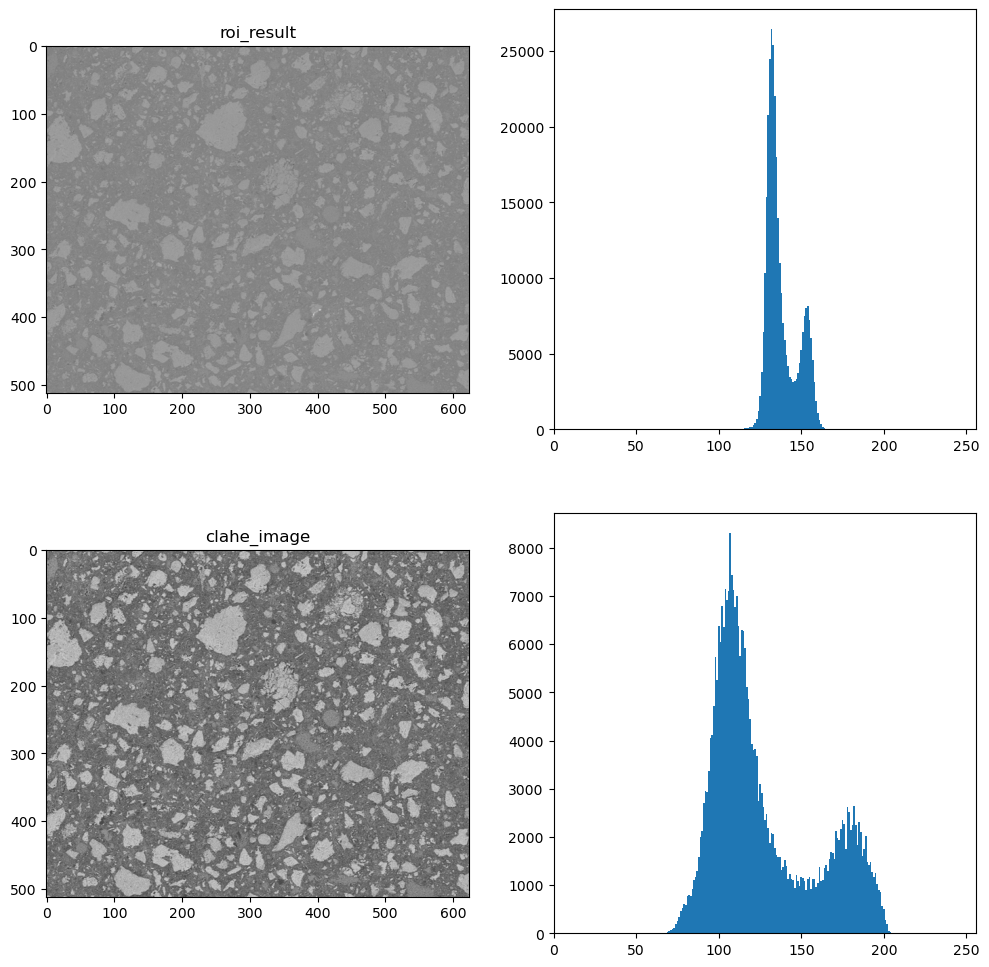

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from image_enhanced.image_preprocess import ImageProcess
from utils.tools import Tools


config = Tools.load_yaml_config("preprocess_config.yaml")
img_process = ImageProcess(config)
# img_process.crop_enhaned_bse()
# bse图像处理
img_process.matched_bse_img_processed()
# ct图像处理
# img_process.matched_ct_img_processed()


# path_pref = f"{img_process.bse_save_path}/{img_process.file_name_pref}"
# roi_enhanced_save_path = f'{path_pref}-enhanced-roi.bmp'
# masked_save_path = f'{path_pref}-masked.bmp'

# roi_enhanced_img = cv2.imread(roi_enhanced_save_path, cv2.IMREAD_GRAYSCALE)
# masked_img = cv2.imread(masked_save_path, cv2.IMREAD_GRAYSCALE)

# # 走错了，应该是直接剪切
# cropped_bse, cropped_masked, mask_with_bse = img_process.crop_processed_bse_bin_images(
#     roi_enhanced_img, masked_img, 
#     [config.start_left, config.start_top],
#     [config.cropped_width, config.cropped_height],
#     [config.offset_x, config.offset_y],
#     f"-{config.offset_x}-{config.offset_y}")

# # 展示四张图象
# rows, colums = 2, 2
# plt.figure(figsize=(8, 8))
# plt.subplot(rows, colums, 1), plt.imshow(roi_enhanced_img, cmap='gray',vmin=0, vmax=255), plt.title('roi_enhanced_img')
# plt.subplot(rows, colums, 2), plt.imshow(cropped_bse, cmap='gray',vmin=0, vmax=255), plt.title('cropped_bse')
# plt.subplot(rows, colums, 3), plt.imshow(cropped_masked, cmap='gray',vmin=0, vmax=255), plt.title('cropped_masked')
# plt.subplot(rows, colums, 4), plt.imshow(mask_with_bse, cmap='gray',vmin=0, vmax=255), plt.title('mask_with_bse')
# h = Tools.caculate_entropy(Tools.downsample_image(np.array(cropped_masked), 2))
# print(f"masked_h: {h}")


In [5]:
import cv2, os
from utils.tools import Tools
from utils.visualize import VisualizeData
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'

downsamples = 2

mv_path = "D:/workspace/ml-workspace/registration/datasets/sample4/ct/matched/cropped_ct_585_1024.bmp"
fx_path = "D:/workspace/ml-workspace/registration/datasets/sample4/bse/s1/100/4-1-1-matched-bse-0-0.bmp"
ms_path = "D:/workspace/ml-workspace/registration/datasets/sample4/bse/s1/100/4-1-1-matched-masked-0-0.bmp"

# img = cv2.imread(mv_path, cv2.IMREAD_GRAYSCALE)

# img2 = Tools.crop_rotate(img, (0, 0), (256, 256), 0)
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1), plt.imshow(img2, cmap='gray'), plt.title('refer')
# # Load the images
moving_img = Tools.downsample_image(cv2.imread(mv_path, cv2.IMREAD_GRAYSCALE), downsamples)
fixed_img = Tools.downsample_image(cv2.imread(fx_path, cv2.IMREAD_GRAYSCALE), downsamples)
masked_img = Tools.downsample_image(cv2.imread(ms_path, cv2.IMREAD_GRAYSCALE), downsamples)

visualize = VisualizeData(moving_img, fixed_img, masked_img)
visualize.spawn_datas([384, 384], 10, "visualize_0_0")

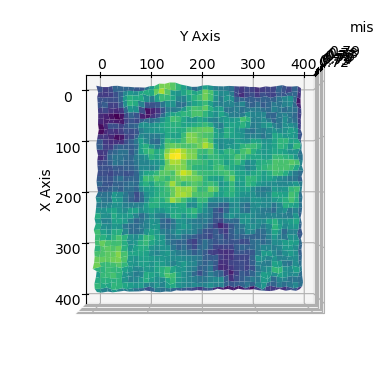

In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# mis, mis_masked
visualize.show_datas("mis", 0, 90)

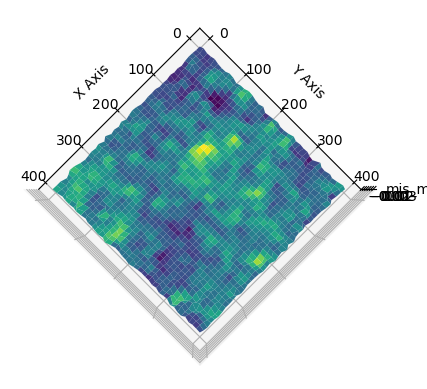

In [11]:
visualize.show_datas("mis_masked", 45, 90)